In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pandas as pd

In [2]:
# Seleccionamos el csv
df = pd.read_csv('../Data/mineria/zonas.csv')

In [3]:
# We do KNN algorithm
clf = neighbors.KNeighborsClassifier(3, weights='distance')
clf.fit(df[['LAT', 'LON']], df['ZONA'])
Z = clf.predict(df[['LAT', 'LON']])
Z

array([13, 12, 13, ...,  4, 10,  0])

In [4]:
# Create a colormap
cmap = ListedColormap(plt.cm.Paired(np.linspace(0, 1, len(np.unique(Z)))))
# We create a matrix of coordinates and assig 
# each element of the matrix to one zone with the KNN algorithm and the K parameter calculated before.

lat_min, lat_max = df['LAT'].min() - 0.01, df['LAT'].max() + 0.01
lon_min, lon_max = df['LON'].min() - 0.01, df['LON'].max() + 0.01

lats, lons = np.meshgrid(np.arange(lat_min, lat_max, 0.001),
                         np.arange(lon_min, lon_max, 0.001))

Z = clf.predict(np.c_[lats.ravel(), lons.ravel()])
Z = Z.reshape(lats.shape)

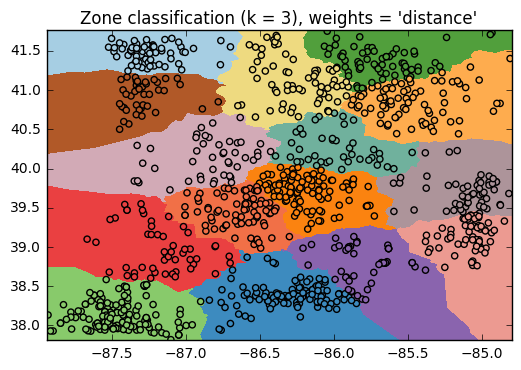

In [5]:
# Plot the results
plt.figure()
plt.pcolormesh(lons, lats, Z, cmap = cmap)
plt.scatter(df['LON'], df['LAT'], c=df['ZONA'], cmap = cmap)
plt.xlim(lons.min(), lons.max())
plt.ylim(lats.min(), lats.max())
plt.title("Zone classification (k = %d), weights = 'distance'" % (3))

plt.show()